## 라이브러리 설치

In [ ]:
%pip install selenium

   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   --- ------------------------------------ 0.9/10.2 MB 29.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.2 MB 40.3 MB/s eta 0:00:01
   ---------------------- ----------------- 5.7/10.2 MB 45.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.3/10.2 MB 48.3 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.2 MB 50.0 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 46.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/448.3 kB ? eta -:--:--
   --------------------------------------- 448.3/448.3 kB 27.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


## 모듈 임포트

In [24]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager

In [25]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

import time

## 패턴 파악

```python
# 직무 탐색 button
//*[@id="root"]/main/div/section/section/div[1]/button[2]
//*[@id="root"]/main/div/section/section/div[1]/button[3]
...
//*[@id="root"]/main/div/section/section/div[1]/button[10]
//*[@id="root"]/main/div/section/section/div[1]/button[22]

# company
//*[@id="root"]/main/div/div/section/div[1]/a/div[3]/div/span
...
//*[@id="root"]/main/div/div/section/div[47]/a/div[3]/div/span

# title
//*[@id="root"]/main/div/div[1]/section/div[1]/a/div[3]/h2
//*[@id="root"]/main/div/div/section/div[47]/a/div[3]/div/span

# tech_stack
//*[@id="root"]/main/div/div/section/div[{1}]/a/div[3]/ul[1]
...
//*[@id="root"]/main/div/div/section/div[2]/a/div[3]/ul[1]

# address
//*[@id="root"]/main/div/div[1]/section/div[{1}]/a/div[3]/ul[2]/li[1]
//*[@id="root"]/main/div/div[1]/section/div[2]/a/div[3]/ul[2]/li[1]
```|

## 기술스택 분류를 위한 전체 기술스택 추출 및 전처리



In [387]:
tech_stack_all

['ASP.NET/ C#/ MSSQL/ REST API/ SQL/ AWS',
 'SW/ 3D Rendering/ C++',
 'C/ C++/ Python/ Java/ JavaScript/ React',
 'C++/ Java/ Python/ C#/ Node.js/ PyTorch/ MongoDB',
 'Node.js/ Vue.js/ Webpack/ Babel/ Slack/ Git/ Visual Studio Code/ HTML5',
 'Python/ PyTorch/ TensorFlow/ DeepLearning/ C/ C++',
 'C++/ Linux/ Python/ Embedded/ c',
 'C++/ TypeScript/ Rust/ React/ AZURE',
 'QA/ Selenium/ Postman/ REST API/ Notion/ Slack',
 'JavaScript/ TypeScript/ HTML5/ CSS 3/ React',
 'ai/인공지능/ machinelearning/ c#/ .net',
 'MachineLearning/ AWS',
 'TensorFlow/ PyTorch/ Python/ C++/ C++ Builder/ Embedded/ Git/ Jira',
 'C/ C++/ Python/ Java/ JavaScript/ React',
 'Linux/ Python/ TensorFlow/ Keras',
 'Node.js/ TypeScript/ MySQL/ JavaScript/ Linux/ jQuery/ Redis/ RabbitMQ',
 'TypeScript/ Python/ Git/ gRPC/ Rest.li/ Docker/ MySQL/ PostgreSQL',
 'Python/ Docker/ PyTorch/ TensorFlow/ OpenCV/ DeepLearning',
 'Python/ Java/ Jenkins/ AWS/ Redis/ PostgreSQL/ MSA/ Docker/ NGINX',
 'SQL/ R/ Python/ Tableau/ Redash/ No

In [389]:
for i in range(len(tech_stack_all)):
    tech_stack_all[i] = tech_stack_all[i].replace('\n·','/')

In [392]:
tech_stack_set = set()
for i in tech_stack_all:
    for j in i.split('/'):
        # string = j.lower()
        tech_stack_set.add(j)

In [393]:
print(tech_stack_set)

{'Jira', 'RF', ' ISMS', 'Visual Basic', ' rxswift', 'ABAP', ' MES', ' ARM', 'hw', ' EDA', ' Spring', 'github', ' VR', '인공지능', ' MCU', ' FFMPEG', ' android os', ' Electron', ' Crashlytics', ' AZURE', ' React', ' F#', 'Selenium', ' Shell', ' Delphi', ' Firewall', ' Spring MVC', ' Vue.js', ' Microsoft SQL Server', 'Unity', ' Qt', ' c', ' SW', ' Python', 'Python', 'Embedded', ' deeplearning', ' AWS', 'Windows', ' OpenAPI', ' Sentry', ' Rust', 'php', ' redis', ' SMPS', ' R', ' Ruby', ' ethernet', 'MCU', ' qa', 'GCP', 'FPGA', 'Verilog', 'dm', ' mysql', ' GraphQL', ' postgresql', ' Mfc', 'HW', ' TestComplete', ' Firebase', 'JavaScript', ' XenServer', ' java', ' linux', 'AWS', ' C++', ' Tableau', ' GitHub Actions', ' CISA', ' MSA', 'WPF', 'Node.js', 'Embedded Linux', ' Lua', ' AngularJS', ' Xcode', ' JSON', 'PCB', 'Swift', 'AWS Shell', ' CISSP', ' WPF', ' Ubuntu', ' WooCommerce', ' RTOS', 'Mfc', ' Mybatis', 'Unreal Engine', ' NLP', 'PyTorch', 'java', ' RabbitMQ', ' Router', ' VHDL', ' Bootstra

In [218]:
import pandas as pd

# 전체 기술 스택 추출
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.jumpit.co.kr/positions?career=0')

tech_stack_all = []

driver.implicitly_wait(2)
button = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/section/section/div[1]/button[1]')
ActionChains(driver).click(button).perform()  # 전체 버튼 클릭

i = 1
while True: # 각각 직무에 해당하는 단일 기업명, 제목, 주소, 기술 스택 추출
    try:   
        # 기술 스택
        driver.implicitly_wait(3)
        element = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/div/section/div[{i}]/a/div[3]/ul[1]')
        tech_stack_all.append(element.text)
        
        driver.execute_script("window.scrollBy(0, 300);") 
        time.sleep(1)
        i += 1
    except NoSuchElementException:
        break


## 직무 추출

In [27]:
# 직무 추출
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.jumpit.co.kr/positions?career=0')

i = 1
while True:
    try:
        driver.implicitly_wait(2)
        element = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/section/section/div[1]/button[{i+1}]')
        positions.append(element.text)
        i += 1
        
    except NoSuchElementException:
        break

In [28]:
len(positions)

21

In [29]:
print(positions) # columns

['서버/백엔드 개발자', '프론트엔드 개발자', '웹 풀스택 개발자', '안드로이드 개발자', 'IOS 개발자', '크로스플랫폼 앱개발자', '게임 클라이언트 개발자', '게임 서버 개발자', 'DBA', '빅데이터 엔지니어', '인공지능/머신러닝', 'devops/시스템 엔지니어', '정보보안 담당자', 'QA 엔지니어', '개발 PM', 'HW/임베디드', 'SW/솔루션', '웹퍼블리셔', 'VR/AR/3D', '블록체인', '기술지원']


## 직무, 기업, 제목(요약), 주소, 기술스택 추출해서 데이터프레임 만들기

```python
//*[@id="root"]/main/div/div/section/div[1]/a/div[3]/div/span
//*[@id="root"]/main/div/div/section/div[2]/a/div[3]/div/span
```

In [30]:
import pandas as pd

# main
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.jumpit.co.kr/positions?career=0')

df = pd.DataFrame(columns=['직무', '기업', '제목', '주소', '기술스택'])


for k in range(2, 23):
    
    driver.implicitly_wait(2)
    button = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/section/section/div[1]/button[{k}]')
    ActionChains(driver).click(button).perform()  # 직무 버튼 클릭

    driver.implicitly_wait(2)
    element = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/section/section/div[1]/button[{k}]') # 단일 직무 추출

    i = 1
    while True: # 각각 직무에 해당하는 단일 기업명, 제목, 주소, 기술 스택 추출
        try:
            data_to_add = [element.text]
            
            # 기업명
            driver.implicitly_wait(3)
            element1 = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/div/section/div[{i}]/a/div[3]/div/span')
            # company.append(element1.text)
            data_to_add.append(element1.text)

            # 제목(타이틀)
            element2 = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, f'//*[@id="root"]/main/div/div[1]/section/div[{i}]/a/div[3]/h2')))
            # title.append(element2.text)
            data_to_add.append(element2.text)

            # 주소
            element3 = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, f'//*[@id="root"]/main/div/div[1]/section/div[{i}]/a/div[3]/ul[2]/li[1]')))
            # address.append(element3.text)
            data_to_add.append(element3.text)
            
            # 기술 스택
            element4 = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, f'//*[@id="root"]/main/div/div/section/div[{i}]/a/div[3]/ul[1]')))
            # tech_stack.append(element4.text)
            data_to_add.append(element4.text)

            # 리스트를 데이터 프레임으로 변환
            new_row_df = pd.DataFrame([data_to_add], columns=df.columns)
            
            # 변환된 데이터 프레임을 원본 데이터 프레임에 연결
            df = pd.concat([df, new_row_df], ignore_index=True)
            
            driver.execute_script("window.scrollBy(0, 300);") 
            time.sleep(1)
            i += 1
            
        except NoSuchElementException:
            break

    # 자바스크립트를 실행하여 페이지 최상단으로 스크롤
    driver.execute_script("window.scrollTo(0, 0);")
            
    driver.implicitly_wait(3)
    
    pre_button = driver.find_element(By.XPATH, f'//*[@id="root"]/main/div/section/section/div[1]/button[{k}]')
    ActionChains(driver).click(pre_button).perform()  # 이전 직무 버튼 클릭

In [33]:
# df.to_csv('original.csv', index=False)
df

,직무,기업,제목,주소,기술스택
0,서버/백엔드 개발자,투비콘,"웹 개발자(ASP.NET, C#) 채용",서울 중구,ASP.NET\n· C#\n· MSSQL\n· REST API\n· SQL\n· AWS
1,서버/백엔드 개발자,쿡앱스,"[쿡앱스] 서버 프로그래머(병역특례-전문연구요원, 석사 학력 이상)",경기 성남시,TypeScript\n· Python\n· Git\n· gRPC\n· Rest.li...
2,서버/백엔드 개발자,티엔에이치,[부산] 백엔드 개발자 (Node.js),부산 해운대구,Node.js\n· TypeScript\n· MySQL\n· JavaScript\n...
3,서버/백엔드 개발자,페이타랩,"[패스오더] 백엔드 개발자 (Spring, Python, MSA) (병역특례/산업기...",서울 강남구,Python\n· Java\n· Jenkins\n· AWS\n· Redis\n· P...
4,서버/백엔드 개발자,챔프스터디,[해커스 교육그룹] PHP 프로그래머 채용,서울 서초구,MariaDB\n· Linux\n· REST API\n· AWS CodeCommit...
...,...,...,...,...,...
486,기술지원,아이엠에스커넥트,"차량용 IoT 단말기 검증, 테스트 부문 (QA)",서울 광진구,Embedded\n· QA
487,기술지원,디엔비소프트,[DNBSOFT]PLC/HMI 자동제어 기술자 모집,강원 원주시,PLC
488,기술지원,아마존웹서비시즈코리아,"Data Center Cable Install Technician, Infrastr...",서울 강남구,Network\n· Switch\n· Router
489,기술지원,아마존웹서비시즈코리아,Rack Decom Datatech,서울 강남구,Linux\n· Network


In [50]:
description = {
    "서버/백엔드 개발자": "웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지보수하는 역할을 담당합니다.",
    "프론트엔드 개발자": "사용자가 직접 상호작용하는 웹사이트나 애플리케이션의 클라이언트 측면을 구축하며, HTML, CSS, JavaScript 등을 활용합니다.",
    "웹 풀스택 개발자": "프론트엔드와 백엔드 개발 모두를 담당하여 웹 애플리케이션의 전체 스택에 대한 작업을 수행합니다.",
    "안드로이드 개발자": "구글의 안드로이드 운영체제 기반의 모바일 애플리케이션 개발을 담당합니다.",
    "IOS 개발자": "애플의 iOS 운영체제를 위한 모바일 애플리케이션을 개발합니다.",
    "크로스플랫폼 앱개발자": "다양한 운영 체제에서 작동하는 애플리케이션을 개발하며, React Native, Flutter 등을 사용할 수 있습니다.",
    "게임 클라이언트 개발자": "게임의 프론트엔드, 사용자 인터페이스와 게임 플레이 경험을 개발합니다.",
    "게임 서버 개발자": "온라인 멀티플레이어 게임의 서버 측 로직과 인프라를 개발하고 유지합니다.",
    "DBA": "데이터베이스의 설계, 구현, 유지 및 보안을 관리하는 역할을 수행합니다.",
    "빅데이터 엔지니어": "대규모 데이터셋을 처리하고 관리하는 시스템을 설계하고 구축합니다.",
    "인공지능/머신러닝": "AI 모델과 알고리즘을 개발하여 컴퓨터가 학습하고 예측하는 데 필요한 기술을 개발합니다.",
    "devops/시스템 엔지니어": "개발과 운영을 연계하여 소프트웨어의 지속적인 통합, 배포, 자동화를 담당합니다.",
    "정보보안 담당자": "정보보안 정책을 수립하고 조직을 보안 위협으로부터 보호하는 역할을 합니다.",
    "QA 엔지니어": "소프트웨어의 품질을 검증하기 위해 테스트를 설계하고 실행하는 역할을 담당합니다.",
    "개발 PM": "소프트웨어 개발 프로젝트의 관리와 팀의 작업을 조정하는 역할을 맡습니다.",
    "HW/임베디드": "하드웨어 및 특정 기능을 수행하기 위한 내장형 시스템 개발을 담당합니다.",
    "SW/솔루션": "특정 문제를 해결하기 위한 소프트웨어 기반의 솔루션을 개발합니다.",
    "웹퍼블리셔": "웹 콘텐츠 생성과 웹사이트 레이아웃, 스타일을 디자인하며 웹 표준을 준수합니다.",
    "VR/AR/3D": "가상현실, 증강현실, 3D 모델링을 활용한 사용자 경험을 제공하는 애플리케이션을 개발합니다.",
    "블록체인": "분산된 기록 보관 방식인 블록체인 기술을 활용한 애플리케이션 개발에 집중합니다.",
    "기술지원": "기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다."
}


## 데이터 전처리

In [206]:
df['기술스택'] = df['기술스택'].str.replace('\n·', '/')
df.drop(columns='제목', inplace=True)
df['설명'] = df['직무'].map(description)

In [211]:
# df = pd.read_csv('original.csv')
# df.to_csv("original_2.csv", index=False)
df

,직무,기업,주소,기술스택,설명
0,서버/백엔드 개발자,투비콘,서울 중구,ASP.NET/ C#/ MSSQL/ REST API/ SQL/ AWS,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
1,서버/백엔드 개발자,쿡앱스,경기 성남시,TypeScript/ Python/ Git/ gRPC/ Rest.li/ Docker...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
2,서버/백엔드 개발자,티엔에이치,부산 해운대구,Node.js/ TypeScript/ MySQL/ JavaScript/ Linux/...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
3,서버/백엔드 개발자,페이타랩,서울 강남구,Python/ Java/ Jenkins/ AWS/ Redis/ PostgreSQL/...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
4,서버/백엔드 개발자,챔프스터디,서울 서초구,MariaDB/ Linux/ REST API/ AWS CodeCommit/ Git/...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
...,...,...,...,...,...
486,기술지원,아이엠에스커넥트,서울 광진구,Embedded/ QA,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.
487,기술지원,디엔비소프트,강원 원주시,PLC,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.
488,기술지원,아마존웹서비시즈코리아,서울 강남구,Network/ Switch/ Router,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.
489,기술지원,아마존웹서비시즈코리아,서울 강남구,Linux/ Network,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.


In [38]:
# <기업 정보> : 기업이름, 주소, 직무
# <직무> : 직무이름, 설명, 기술스택
# <기술스택> : 스택이름, 스택유형

## 주소 전처리

In [249]:
df = pd.read_csv('original_2.csv')
df

,직무,기업,주소,기술스택,설명
0,서버/백엔드 개발자,투비콘,서울 중구,ASP.NET/ C#/ MSSQL/ REST API/ SQL/ AWS,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
1,서버/백엔드 개발자,쿡앱스,경기 성남시,TypeScript/ Python/ Git/ gRPC/ Rest.li/ Docker...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
2,서버/백엔드 개발자,티엔에이치,부산 해운대구,Node.js/ TypeScript/ MySQL/ JavaScript/ Linux/...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
3,서버/백엔드 개발자,페이타랩,서울 강남구,Python/ Java/ Jenkins/ AWS/ Redis/ PostgreSQL/...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
4,서버/백엔드 개발자,챔프스터디,서울 서초구,MariaDB/ Linux/ REST API/ AWS CodeCommit/ Git/...,"웹사이트나 애플리케이션의 서버 측면, 데이터베이스 관리, 서버 로직을 개발하고 유지..."
...,...,...,...,...,...
486,기술지원,아이엠에스커넥트,서울 광진구,Embedded/ QA,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.
487,기술지원,디엔비소프트,강원 원주시,PLC,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.
488,기술지원,아마존웹서비시즈코리아,서울 강남구,Network/ Switch/ Router,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.
489,기술지원,아마존웹서비시즈코리아,서울 강남구,Linux/ Network,기술적 문제에 대한 고객 지원과 솔루션을 제공하는 역할을 수행합니다.


In [250]:
# 주소가 2개 였던 기업 -> print(idx) # [28, 54, 61, 63, 232, 328, 390, 416]
company = df[['기업', '주소', '직무']]
idx = []
for index, row in company.iterrows():
    if len(row.iloc[1].split(',')) == 2:
        idx.append(index)

In [251]:
# 똑같은 주소를 2개 가지고 있을 때 하나의 행을 두개의 행으로 분리
def split_location(row):
    split_rows = [row.iloc[:2].tolist() + [location.strip()] + row.iloc[3:].tolist() for location in row.iloc[2].split(',')]
    split_df = pd.DataFrame(split_rows, columns=df.columns)
    return split_df

for i in idx: # 분리한 두개의 데이터를 맨 아래에 추가
    new_record = split_location(df.iloc[i])
    df = pd.concat([df, new_record])

df.drop(idx, axis=0, inplace=True) # 행 삭제
df = df.reset_index(drop=True)

In [254]:
df.to_csv('original_3.csv') # 주소 전처리된 데이터

## 기업 정보 (테이블 만들기)

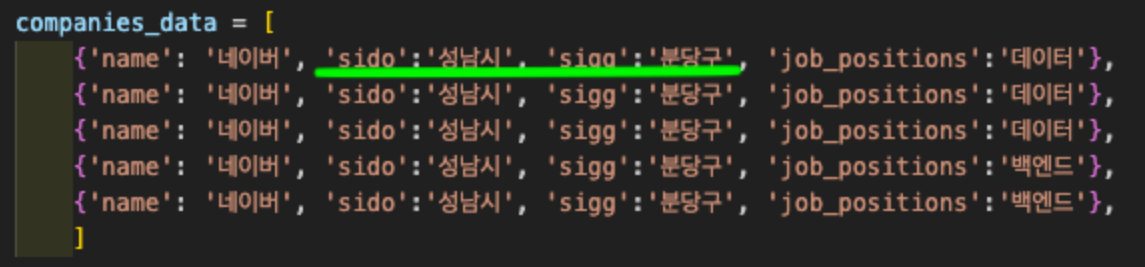

In [166]:
# <기업 정보> 전처리
company = df[['기업', '주소', '직무']]
adr = company['주소'].apply(lambda x: x.split())

# 주소 처리
address_df = pd.DataFrame(adr.tolist(), columns=['시도', '시군구'])
address_df

,시도,시군구
0,서울,중구
1,경기,성남시
2,부산,해운대구
3,서울,강남구
4,서울,서초구
...,...,...
494,기타,None
495,서울,송파구
496,경기,성남시
497,경기,성남시


In [168]:
company.drop(columns='주소', inplace=True)
company_result = pd.concat([company, address_df], axis=1)

C:\Users\ggb05\AppData\Local\Temp\ipykernel_21988\2502269880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company.drop(columns='주소', inplace=True)


In [172]:
company_result = company_result.dropna()

In [215]:
# company_result.reset_index(drop=True)
company_result.to_json('companies_data.json', orient='records', force_ascii=False)

In [190]:
# company_result = company_result[['기업', '시도', '시군구', '직무']]

company_result.columns = ['name', 'sido', 'sigg', 'job_positions']

In [188]:
company_result.to_csv('companies_data.csv', index=False)

## 직무 정보 (테이블 만들기)

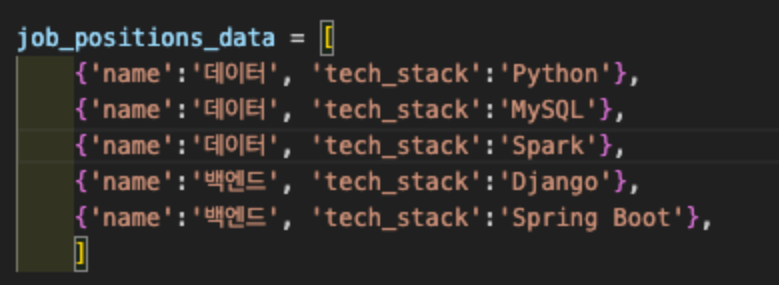

In [281]:
df = pd.read_csv('original_3.csv')

In [283]:
job_positions_data =df[['직무', '기술스택']]
job_positions_data

,직무,기술스택
0,서버/백엔드 개발자,ASP.NET/ C#/ MSSQL/ REST API/ SQL/ AWS
1,서버/백엔드 개발자,TypeScript/ Python/ Git/ gRPC/ Rest.li/ Docker...
2,서버/백엔드 개발자,Node.js/ TypeScript/ MySQL/ JavaScript/ Linux/...
3,서버/백엔드 개발자,Python/ Java/ Jenkins/ AWS/ Redis/ PostgreSQL/...
4,서버/백엔드 개발자,MariaDB/ Linux/ REST API/ AWS CodeCommit/ Git/...
...,...,...
494,SW/솔루션,SAP/ ERP/ SQL/ Network
495,SW/솔루션,C++/ .NET/ OpenCV/ DICOM/ AR/ VR
496,SW/솔루션,C++/ .NET/ OpenCV/ DICOM/ AR/ VR
497,SW/솔루션,C/ C++/ Linux/ SW


In [284]:
job_positions_data['기술스택'] = job_positions_data['기술스택'].str.split('/').apply(lambda x: [item.strip() for item in x])

C:\Users\ggb05\AppData\Local\Temp\ipykernel_21988\2772936564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_positions_data['기술스택'] = job_positions_data['기술스택'].str.split('/').apply(lambda x: [item.strip() for item in x])


In [285]:
job_positions_data = job_positions_data.explode('기술스택') # ⭐
job_positions_data

,직무,기술스택
0,서버/백엔드 개발자,ASP.NET
0,서버/백엔드 개발자,C#
0,서버/백엔드 개발자,MSSQL
0,서버/백엔드 개발자,REST API
0,서버/백엔드 개발자,SQL
...,...,...
497,SW/솔루션,SW
498,SW/솔루션,C
498,SW/솔루션,C++
498,SW/솔루션,Linux


In [298]:
job_positions_data.columns = ['name', 'tech_stack']
job_positions_data = job_positions_data.reset_index(drop=True)

In [299]:
job_positions_data

,name,tech_stack
0,서버/백엔드 개발자,ASP.NET
1,서버/백엔드 개발자,C#
2,서버/백엔드 개발자,MSSQL
3,서버/백엔드 개발자,REST API
4,서버/백엔드 개발자,SQL
...,...,...
2553,SW/솔루션,SW
2554,SW/솔루션,C
2555,SW/솔루션,C++
2556,SW/솔루션,Linux


In [300]:
job_positions_data.to_json('job_positions_data.json', orient='records', force_ascii=False)

In [301]:
job_positions_data.to_csv("job_positions_data.csv", index=False)

## 기술 스택 정보 (테이블 만들기)

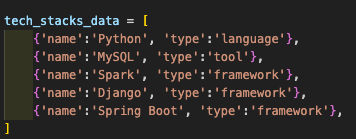

In [551]:
tech_stacks_data = job_positions_data[['tech_stack']]
# tech_stacks_data

In [552]:
# tech_stacks_data

In [553]:
tech_stacks_data['type'] = tech_stacks_data['tech_stack'].apply(mapping)

In [559]:
tech_stacks_data.columns = ['name', 'type']
tech_stacks_data.to_json('tech_stacks_data.json', orient='records', force_ascii=False)
tech_stacks_data.to_csv("tech_stacks_data.csv", index=False)

In [556]:
pd.set_option('display.max_rows', None)
for i in tech_stacks_data[tech_stacks_data['type'].isna()]['tech_stack']:
    print(i, end=', ')

In [557]:
tech_stacks_data

,tech_stack,type
0,ASP.NET,프레임워크
1,C#,프로그래밍 언어
2,MSSQL,데이터베이스
3,REST API,인프라
4,SQL,프로그래밍 언어
5,AWS,인프라
6,TypeScript,프로그래밍 언어
7,Python,프로그래밍 언어
8,Git,데브옵스
9,gRPC,개발 도구


In [498]:
tech_stacks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tech_stack  2558 non-null   object
 1   type        2464 non-null   object
dtypes: object(2)
memory usage: 40.1+ KB


In [488]:
def mapping(x):
    for k,v in tech_stack.items():
        if x in v:
            return k

## 분류

몇 가지 용어들에 대한 분류는 논쟁의 여지가 있을 수 있으며,   
각각의 용어는 해당 분야의 전문가들 사이에서도 다르게 분류될 수 있다.

In [550]:
tech_stack = {
    "프로그래밍 언어": {
        "Visual Basic", "ABAP", "C", "C++", "C#", "F#", "Python", "R", "Ruby", "PHP", "Java", "JavaScript", "Go", "Sass", "Shell", "shell", "SASS", "SCSS",
        "TypeScript", "Swift", "Kotlin", "Scala", "Golang", "Rust", "Lua", "Perl", "Haskell", "Dart", "Visual C++", "html5", "css 3",
         "Go", "python", "javascript", "c#", ".net", "java", "php", "Objective-C", "c", "c++", "swift", "HTML5", "CSS 3", "SQL", "ES6", "Verilog", "VHDL", "Delphi", "JSP"
    },
    "프레임워크": {
        "Spring", "Spring MVC", "Spring Boot", "React.js Boilerplate", "Vue.js", "AngularJS", "Angular 2", "Qt", "WPF", "qt", "wpf", "Vb.net",
        "Electron", ".NET", "ASP.NET", "Django", "Laravel", "FastAPI", "ExpressJS", "Rails", "Flask", "NestJS", ".NET/WPF",
        "SwiftUI", "Node.js", "Spring Framework", "Spring Data JPA", "Next.js", "TypeORM", "Flutter", "React Native", "Bootstrap", "Gunicorn", "CodeIgniter", "Android SDK", "JSX"
    },
    "라이브러리": {
        "rxswift", "React", "Redux", "TensorFlow", "PyTorch", "keras", "Xcode", "jQuery", "scikit-learn", "FFMPEG", "SAP", "Qt", "opencv", "React Query", "jquery",
        "OpenGL", "pandas", "OpenCV", "WebSocket", "RabbitMQ", "Redux-saga", "Recoil", "OkHttp", "Keras", "TensorFlow", "PyTorch", "Pandas", "Mfc", "jQuery", "tensorflow", "pytorch"
    },
    "빅데이터": {
        "Hadoop", "Spark", "Elasticsearch", "Apache Tomcat", "BigData", "Kafka", "Redis", "ELK", "Splunk", "kafka"
    },
    "인프라": {
        "AWS", "GCP", "AZURE", "Kubernetes", "OpenStack", "Azure IoT Hub", "AWS CodeCommit", "vmware", "XenServer", 
        "AWS WAF", "Amazon EC2", "AWS App Mesh", "CloudFlare", "Microsoft SQL Server", "Oracle",
       "REST API" , "elasticsearch", "aws", "MQTT", "GraphQL", "MSA", "NGINX", "Firebase", "Azure CDN", "Amazon S3", "Vercel", 'AWS Shell'
    },
    "데브옵스": {
        "Jira", "GitHub Actions", "Git", "Jenkins", "Selenium", "GitLab", "Bitbucket", "CircleCI", "Ansible",
        "Terraform", "Docker Compose", "GitHub", 'Docker', 'Jenkins', 'Confluence', "K8S", "CodePush"
    },
    "운영체제": {
        "Android OS", "iOS", "Windows", "Linux", "Ubuntu", "CentOS", "macOS", "Embedded Linux",
        "android os", "ios", "RTOS", "linux", "windows", "Yocto", "Windows Server"
    },
    "데이터베이스": {
        "MySQL", "PostgreSQL", "Redis", "SQLite", "Neo4j", "MariaDB", "Microsoft SQL Server", 
        "Oracle", "NoSql", "postgresql", "amazon dynamodb", "mysql", "MSSQL", "MongoDB", "RDB", "DB", "Mybatis", "Redash", "redis"
    },
    "하드웨어": {
        "ARM", "MCU", "SMPS", "PCB", "HW", "PLC", "FW", "Embedded", "Arduino", "RPA", "embedded", "verilog", "fw", "hw"
    },
    "네트워크": {
        "Firewall", "Router", "Ethernet", "VPN", "IP", "Switch", "Network", "Ethernet", "TCP", "JSON", "Apache HTTP Server", "network",
        "Rest API", "OpenAPI", "JsonAPI", "DICOM", "rest api", "ethernet", "REST API", "Utm", "Cisco", "redux-saga", "Socket.IO", "Backendless", 
    },
    "테스트 도구" : {
        "Crashlytics", "QA", "Cypress", "Zephyr", "Fiddler", "Postman", "Sentry", "Grafana", "TeamCity", "rpa", "TestComplete"
    },
    "개발 도구": {
        "Visual Studio", "Android Studio", "Eclipse", "Unity", "Unreal Engine", "Orcad", "Autocad", "Figma", "Tableau", "notion.so", "github", "Microsoft Office 365", "Git", "pci proxy", "microsoft office 365",
        "Visual Studio Code", "Webpack", "Babel", "fastlane", "gRPC", "Rest.li", "GitHub", "Slack", "Notion", "SourceTree", "Notion.so", "Visual Studio", "ReSharper",
        "qa", "Zeplin", "Microsoft Excel", "WordPress", "C++ Builder"
    },
    "보안 및 인증": {
        "CISSP", "CISA", "OAuth2", "OpenSSL", "IPS", "ISMS", "UTM"
    },
    "개발 방법론 및 프로세스": {
        "Agile", "DevOps", "Blockchain", "Smartcontract", "MES", "ERP", "Agile methodologies", "Pads", "EDA", "RF", "Circuit design", "Pads", "orcad", "pads", 
        "Solidworks", "3D Volume Rendering", "pcb"
    },
    "프로그래밍 관련 기술 및 개념": {
        "OpenGL", "DirectX", "VR", "AR", "IoT", "FPGA",
        "ASIC", "3D Rendering", "MVC", "SW", "sw"
        
    },
    "인공지능 및 블록체인 관련 개념": {
            "인공지능", "Solidity", "blockchain", "NLP", "AI", "Machine Learning", "Deep Learning", "DeepLearning", "deeplearning", "MachineLearning",
        "AI", "Machine Learning", "ai", "machinelearning", "ROS", "Google AI Platform", "CUDA", "MATLAB"
    },

    "기타": {
        "SPICE", "2D Rendering", "labview", "GUI", "VBA", "Argo", "Analog", "dm", "WooCommerce"
    }
}
